# (전국) 코로나 확진자수 시각화

## 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
data = pd.read_csv("./data/코로나바이러스감염증-19(COVID-19) 현황 누적 데이터 (2021.07.26)/Covid19SidoInfState.csv")

,seq,stdDay,gubun,gubunCn,gubunEn,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt
0,1,2020년 3월 1일 16시,합계,NaN,NaN,18.0,586.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
1,2,2020년 3월 1일 16시,서울,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
2,3,2020년 3월 1일 16시,부산,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
3,4,2020년 3월 1일 16시,대구,NaN,NaN,9.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
4,5,2020년 3월 1일 16시,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,11042,2021년 07월 26일 00시,전남,全南,Jeollanam-do,17.0,28.0,1697.0,105.21,1948.0,234.0,2.0,26.0,2021-07-26 09:40:52.081,NaN
10187,11043,2021년 07월 26일 00시,경북,庆北,Gyeongsangbuk-do,87.0,22.0,4999.0,201.56,5320.0,234.0,1.0,21.0,2021-07-26 09:40:52.081,NaN
10188,11044,2021년 07월 26일 00시,경남,庆南,Gyeongsangnam-do,22.0,78.0,5664.0,201.48,6730.0,1044.0,3.0,75.0,2021-07-26 09:40:52.081,NaN
10189,11045,2021년 07월 26일 00시,제주,济州,Jeju,1.0,12.0,1442.0,240.72,1624.0,181.0,1.0,11.0,2021-07-26 09:40:52.082,NaN


In [5]:
co_inc= data[['stdDay','gubun','incDec']]

In [6]:
co_inc = co_inc[co_inc['gubun']=='합계']

### unique한 dataframe을 만드는 시도

In [6]:
co_inc.fillna(0,inplace=True)

C:\Users\scarl\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [67]:
pd.set_option('display.max_rows', 550)

In [7]:
co_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 10172
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stdDay  537 non-null    object 
 1   gubun   537 non-null    object 
 2   incDec  537 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.8+ KB


In [8]:
co_inc = co_inc.astype({'incDec': 'int32'})

In [9]:
co_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 10172
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stdDay  537 non-null    object
 1   gubun   537 non-null    object
 2   incDec  537 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 14.7+ KB


In [27]:
co_inc

,stdDay,gubun,incDec
0,2020년 3월 1일 16시,합계,586
19,2020년 3월 4일 00시,합계,516
37,2020년 3월 5일 00시,합계,438
55,2020년 3월 6일 00시,합계,518
73,2020년 3월 7일 00시,합계,483
...,...,...,...
10096,2021년 07월 22일 00시,합계,1842
10115,2021년 07월 23일 00시,합계,1630
10134,2021년 07월 24일 00시,합계,1629
10153,2021년 07월 25일 00시,합계,1487


### drop_duplicates()를 사용해 중복 제거

In [7]:
unique = co_inc.drop_duplicates()
unique

,stdDay,gubun,incDec
0,2020년 3월 1일 16시,합계,586.0
19,2020년 3월 4일 00시,합계,516.0
37,2020년 3월 5일 00시,합계,438.0
55,2020년 3월 6일 00시,합계,518.0
73,2020년 3월 7일 00시,합계,483.0
...,...,...,...
10077,2021년 07월 22일 00시,합계,1842.0
10115,2021년 07월 23일 00시,합계,1630.0
10134,2021년 07월 24일 00시,합계,1629.0
10153,2021년 07월 25일 00시,합계,1487.0


In [22]:
co_inc.index

Int64Index([    0,    19,    37,    55,    73,    91,   109,   127,   145,
              163,
            ...
            10001, 10020, 10039, 10058, 10077, 10096, 10115, 10134, 10153,
            10172],
           dtype='int64', length=537)

In [23]:
co_inc['stdDay'].unique()

array(['2020년 3월 1일 16시', '2020년 3월 4일 00시', '2020년 3월 5일 00시',
       '2020년 3월 6일 00시', '2020년 3월 7일 00시', '2020년 3월 8일 00시',
       '2020년 3월 9일 00시', '2020년 3월 10일 00시', '2020년 3월 11일 00시',
       '2020년 3월 12일 00시', '2020년 3월 13일 00시', '2020년 3월 14일 00시',
       '2020년 3월 15일 00시', '2020년 3월 16일 00시', '2020년 3월 17일 00시',
       '2020년 3월 18일 00시', '2020년 3월 19일 00시', '2020년 3월 20일 00시',
       '2020년 3월 21일 00시', '2020년 3월 22일 00시', '2020년 3월 23일 00시',
       '2020년 3월 24일 00시', '2020년 3월 25일 00시', '2020년 3월 26일 00시',
       '2020년 3월 27일 00시', '2020년 03월 28일 00시', '2020년 03월 29일 00시',
       '2020년 03월 30일 00시', '2020년 03월 31일 00시', '2020년 04월 01일 00시',
       '2020년 04월 02일 00시', '2020년 04월 03일 00시', '2020년 04월 04일 00시',
       '2020년 04월 05일 00시', '2020년 04월 06일 00시', '2020년 04월 07일 00시',
       '2020년 04월 08일 00시', '2020년 04월 09일 00시', '2020년 4월 08일 00시',
       '2020년 4월 09일 00시', '2020년 04월 10일 00시', '2020년 04월 11일 00시',
       '2020년 4월 12일 00시', '2020년 04월 13일 00시', '2020년

#### unique의 index를 통해, drop_duplicates 시도(pass)

In [25]:
u, indices = np.unique(co_inc['stdDay'], return_index=True)
len(indices)

512

In [26]:
u

array(['2020년 03월 28일 00시', '2020년 03월 29일 00시', '2020년 03월 30일 00시',
       '2020년 03월 31일 00시', '2020년 04월 01일 00시', '2020년 04월 02일 00시',
       '2020년 04월 03일 00시', '2020년 04월 04일 00시', '2020년 04월 05일 00시',
       '2020년 04월 06일 00시', '2020년 04월 07일 00시', '2020년 04월 08일 00시',
       '2020년 04월 09일 00시', '2020년 04월 10일 00시', '2020년 04월 11일 00시',
       '2020년 04월 13일 00시', '2020년 04월 14일 00시', '2020년 04월 15일 00시',
       '2020년 04월 16일 00시', '2020년 04월 17일 00시', '2020년 04월 19일 00시',
       '2020년 04월 20일 00시', '2020년 04월 21일 00시', '2020년 04월 22일 00시',
       '2020년 04월 23일 00시', '2020년 04월 24일 00시', '2020년 04월 26일 00시',
       '2020년 04월 27일 00시', '2020년 04월 28일 00시', '2020년 04월 29일 00시',
       '2020년 05월 02일 00시', '2020년 05월 03일 00시', '2020년 05월 04일 00시',
       '2020년 05월 06일 00시', '2020년 05월 07일 00시', '2020년 05월 08일 00시',
       '2020년 05월 09일 00시', '2020년 05월 11일 00시', '2020년 05월 12일 00시',
       '2020년 05월 13일 00시', '2020년 05월 15일 00시', '2020년 05월 17일 00시',
       '2020년 05월 18

In [70]:
len(np.array(co_inc))

537

In [ ]:
print(np.unique(df[['LastName', 'FirstName']].values))

In [25]:
co_inc=co_inc[['stdDay','incDec']]
co_inc

## 일간 확진자수 시각화 (2020년)

In [18]:
unique

,stdDay,gubun,incDec,year
0,2020년 3월 1일 16시,합계,586.0,2020년
19,2020년 3월 4일 00시,합계,516.0,2020년
37,2020년 3월 5일 00시,합계,438.0,2020년
55,2020년 3월 6일 00시,합계,518.0,2020년
73,2020년 3월 7일 00시,합계,483.0,2020년
...,...,...,...,...
6049,2020년 12월 27일 00시,합계,970.0,2020년
6068,2020년 12월 28일 00시,합계,808.0,2020년
6087,2020년 12월 29일 00시,합계,1046.0,2020년
6125,2020년 12월 30일 00시,합계,1050.0,2020년


In [8]:
years=[]
for days in unique['stdDay']:
    years.append(days.split()[0])
years

['2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',
 '2020년',


In [9]:
unique['year']=years
unique

<ipython-input-9-06b4b24fba8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['year']=years


,stdDay,gubun,incDec,year
0,2020년 3월 1일 16시,합계,586.0,2020년
19,2020년 3월 4일 00시,합계,516.0,2020년
37,2020년 3월 5일 00시,합계,438.0,2020년
55,2020년 3월 6일 00시,합계,518.0,2020년
73,2020년 3월 7일 00시,합계,483.0,2020년
...,...,...,...,...
10077,2021년 07월 22일 00시,합계,1842.0,2021년
10115,2021년 07월 23일 00시,합계,1630.0,2021년
10134,2021년 07월 24일 00시,합계,1629.0,2021년
10153,2021년 07월 25일 00시,합계,1487.0,2021년


In [10]:
unique = unique[unique['year']=='2020년']

In [11]:
len(unique)

306

In [12]:
x_ticks=np.arange(3,13)
x_ticks

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

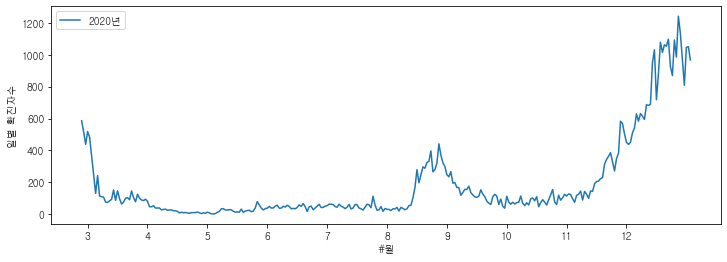

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(unique['stdDay'],unique['incDec'], label="2020년")
#plt.xticks(np.arange(0, 2, 0.2), labels=['Jan', '', 'Feb', '', 'Mar', '', 'May', '', 'June', '', 'July'])
plt.xticks(np.arange(3,303,30),x_ticks)
plt.legend(fontsize=10)
plt.xlabel("#월")
plt.ylabel("일별 확진자수")
plt.show()

결과:테디베어 박물관. 3월, 12월 떨어지는 모습
오토캠핑장 8월 하락, 청암산도 잘되다 하반기 하락, 은파호수 공원 8월 하락 

+ 전북(데이터 有), 혹은 군산 데이터를 활용해서 분석 추가

# 실내/ 실외 관광지와 비교

## 월 데이터 추출하여 월별 코로나 확진자수 시각화

In [20]:
unique

,stdDay,gubun,incDec,year
0,2020년 3월 1일 16시,합계,586.0,2020년
19,2020년 3월 4일 00시,합계,516.0,2020년
37,2020년 3월 5일 00시,합계,438.0,2020년
55,2020년 3월 6일 00시,합계,518.0,2020년
73,2020년 3월 7일 00시,합계,483.0,2020년
...,...,...,...,...
6049,2020년 12월 27일 00시,합계,970.0,2020년
6068,2020년 12월 28일 00시,합계,808.0,2020년
6087,2020년 12월 29일 00시,합계,1046.0,2020년
6125,2020년 12월 30일 00시,합계,1050.0,2020년


In [34]:
month=[]
for days in unique['stdDay']:
    x = days.split()[1]
    if x == '3월':
        x='03월'
    elif x == '4월':
        x='04월'
    elif x == '5월':
        x='05월'
    elif x == '6월':
        x='06월'
    month.append(x)
month

['03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '03월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '04월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '05월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '06월',
 '07월',
 '07월',
 '07월',


In [35]:
unique['month']=month
unique

<ipython-input-35-35fb2573ee76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['month']=month


,stdDay,gubun,incDec,year,month
0,2020년 3월 1일 16시,합계,586.0,2020년,03월
19,2020년 3월 4일 00시,합계,516.0,2020년,03월
37,2020년 3월 5일 00시,합계,438.0,2020년,03월
55,2020년 3월 6일 00시,합계,518.0,2020년,03월
73,2020년 3월 7일 00시,합계,483.0,2020년,03월
91,2020년 3월 8일 00시,합계,367.0,2020년,03월
109,2020년 3월 9일 00시,합계,248.0,2020년,03월
127,2020년 3월 10일 00시,합계,131.0,2020년,03월
145,2020년 3월 11일 00시,합계,242.0,2020년,03월
163,2020년 3월 12일 00시,합계,114.0,2020년,03월


In [27]:
pd.set_option('display.max_rows', 310)

In [32]:
unique

,stdDay,gubun,incDec,year,month
0,2020년 3월 1일 16시,합계,586.0,2020년,03월
19,2020년 3월 4일 00시,합계,516.0,2020년,03월
37,2020년 3월 5일 00시,합계,438.0,2020년,03월
55,2020년 3월 6일 00시,합계,518.0,2020년,03월
73,2020년 3월 7일 00시,합계,483.0,2020년,03월
91,2020년 3월 8일 00시,합계,367.0,2020년,03월
109,2020년 3월 9일 00시,합계,248.0,2020년,03월
127,2020년 3월 10일 00시,합계,131.0,2020년,03월
145,2020년 3월 11일 00시,합계,242.0,2020년,03월
163,2020년 3월 12일 00시,합계,114.0,2020년,03월


In [36]:
table = pd.pivot_table(unique, values='incDec', index=['month'], aggfunc=np.sum)
table

,incDec
month,
03월,5560.0
04월,1057.0
05월,703.0
06월,1334.0
07월,1509.0
08월,5642.0
09월,3865.0
10월,2713.0
11월,7769.0


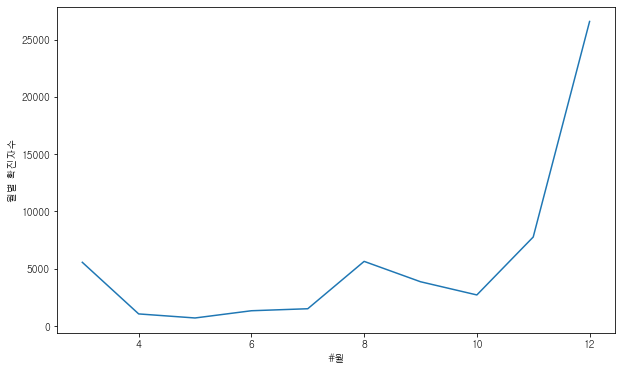

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(x_ticks,table['incDec'], label="2020년")
#plt.xticks(np.arange(0, 2, 0.2), labels=['Jan', '', 'Feb', '', 'Mar', '', 'May', '', 'June', '', 'July'])
plt.xlabel("#월")
plt.ylabel("월별 확진자수")
plt.show()

In [50]:
attr = pd.read_csv('./Gunsan_Attractions_in_out2020.csv',index_col='실내외구분')## index_col 유용!
attr

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
실내외구분,,,,,,,,,,,,
복합,52777,16910,20327,27684,42132,25440,25622,40910,15964,40179,30259,15666
실내,96308,14999,9888,14849,42251,48172,34504,66533,6690,31549,38888,5218
실외,237046,205939,245191,407785,373749,352003,325418,411209,400500,418870,256077,212489


In [51]:
X=attr.T
X

실내외구분,복합,실내,실외
01월,52777,96308,237046
02월,16910,14999,205939
03월,20327,9888,245191
04월,27684,14849,407785
05월,42132,42251,373749
06월,25440,48172,352003
07월,25622,34504,325418
08월,40910,66533,411209
09월,15964,6690,400500
10월,40179,31549,418870


In [52]:
비율 = X['실내']/X['실외']
비율

01월    0.406284
02월    0.072832
03월    0.040328
04월    0.036414
05월    0.113046
06월    0.136851
07월    0.106030
08월    0.161799
09월    0.016704
10월    0.075319
11월    0.151861
12월    0.024557
dtype: float64

In [53]:
X['실내/실외']=비율
X

실내외구분,복합,실내,실외,실내/실외
01월,52777,96308,237046,0.406284
02월,16910,14999,205939,0.072832
03월,20327,9888,245191,0.040328
04월,27684,14849,407785,0.036414
05월,42132,42251,373749,0.113046
06월,25440,48172,352003,0.136851
07월,25622,34504,325418,0.106030
08월,40910,66533,411209,0.161799
09월,15964,6690,400500,0.016704
10월,40179,31549,418870,0.075319


In [55]:
X['실내/실외'][2:]

03월    0.040328
04월    0.036414
05월    0.113046
06월    0.136851
07월    0.106030
08월    0.161799
09월    0.016704
10월    0.075319
11월    0.151861
12월    0.024557
Name: 실내/실외, dtype: float64

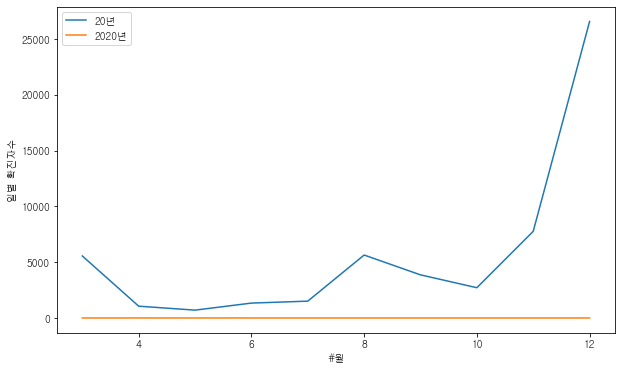

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(x_ticks,table['incDec'], label="20년")
plt.plot(x_ticks,X['실내/실외'][2:], label="2020년")
plt.legend(fontsize=10)
plt.xlabel("#월")
plt.ylabel("일별 확진자수")
plt.show()

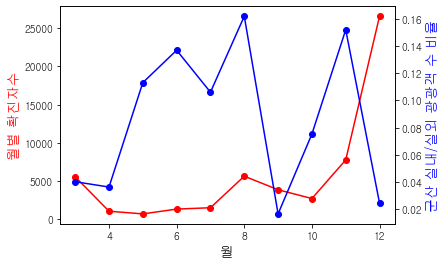

In [60]:
fig,ax = plt.subplots()
# make a plot
ax.plot(x_ticks,table['incDec'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("월",fontsize=14)
# set y-axis label
ax.set_ylabel("월별 확진자수",color="red",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_ticks,X['실내/실외'][2:],color="blue",marker="o")
ax2.set_ylabel("군산 실내/실외 광광객 수 비율",color="blue",fontsize=14)
plt.show()

#### 결론: 확진자수가 증가세, 감소세로 전환되고 다음 달에 실외 대비 실내 관광객 수가 대폭 감소/ 증가 하는 경향을 보인다.
 -> 확진자수가 증가하면 일정 시간 후, 실내 관광객 수가 증가한다.